# Adult Income Census

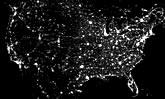

===============================================
### Attribute Information:

##### Independent Variables:
* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **fnlwgt**: continuous. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-  4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-       spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,          Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-                 Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country** : United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

##### Dependent Variable:
* **Salary** : <=50K and >50K

### About the dataset

* **Creator of Dataset : Barry Becker**
* **Number of records : 32561**
* **Number of attributes: 15**
* **Shape of Dataset: (32561,15)**
* **Highest Achieved Accuracy on the dataset by UCI: 84%**


### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

================================================

###  Step 1: EDA (Exploratory Data Analysis)

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
df = pd.read_excel('adult.xlsx')

#Renaming the incorrectly spelled columns
df = df.rename({'captial_gain':'capital_gain','captial_loss':'capital_loss'}, axis=1)
df.head()

,age,workclass,fnlwgt,education,educationnum,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
#Looking at how our data looks
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
educationnum      32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
Salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
#Checking the shape of our dataset
df.shape

(32561, 15)

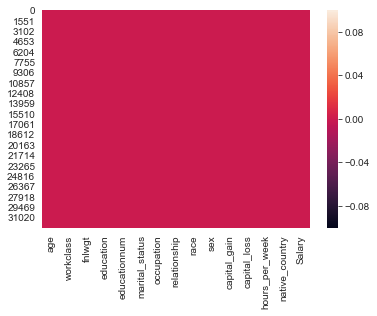

In [4]:
sns.heatmap(df.isnull());

#### So clearly our dataset has no null values 

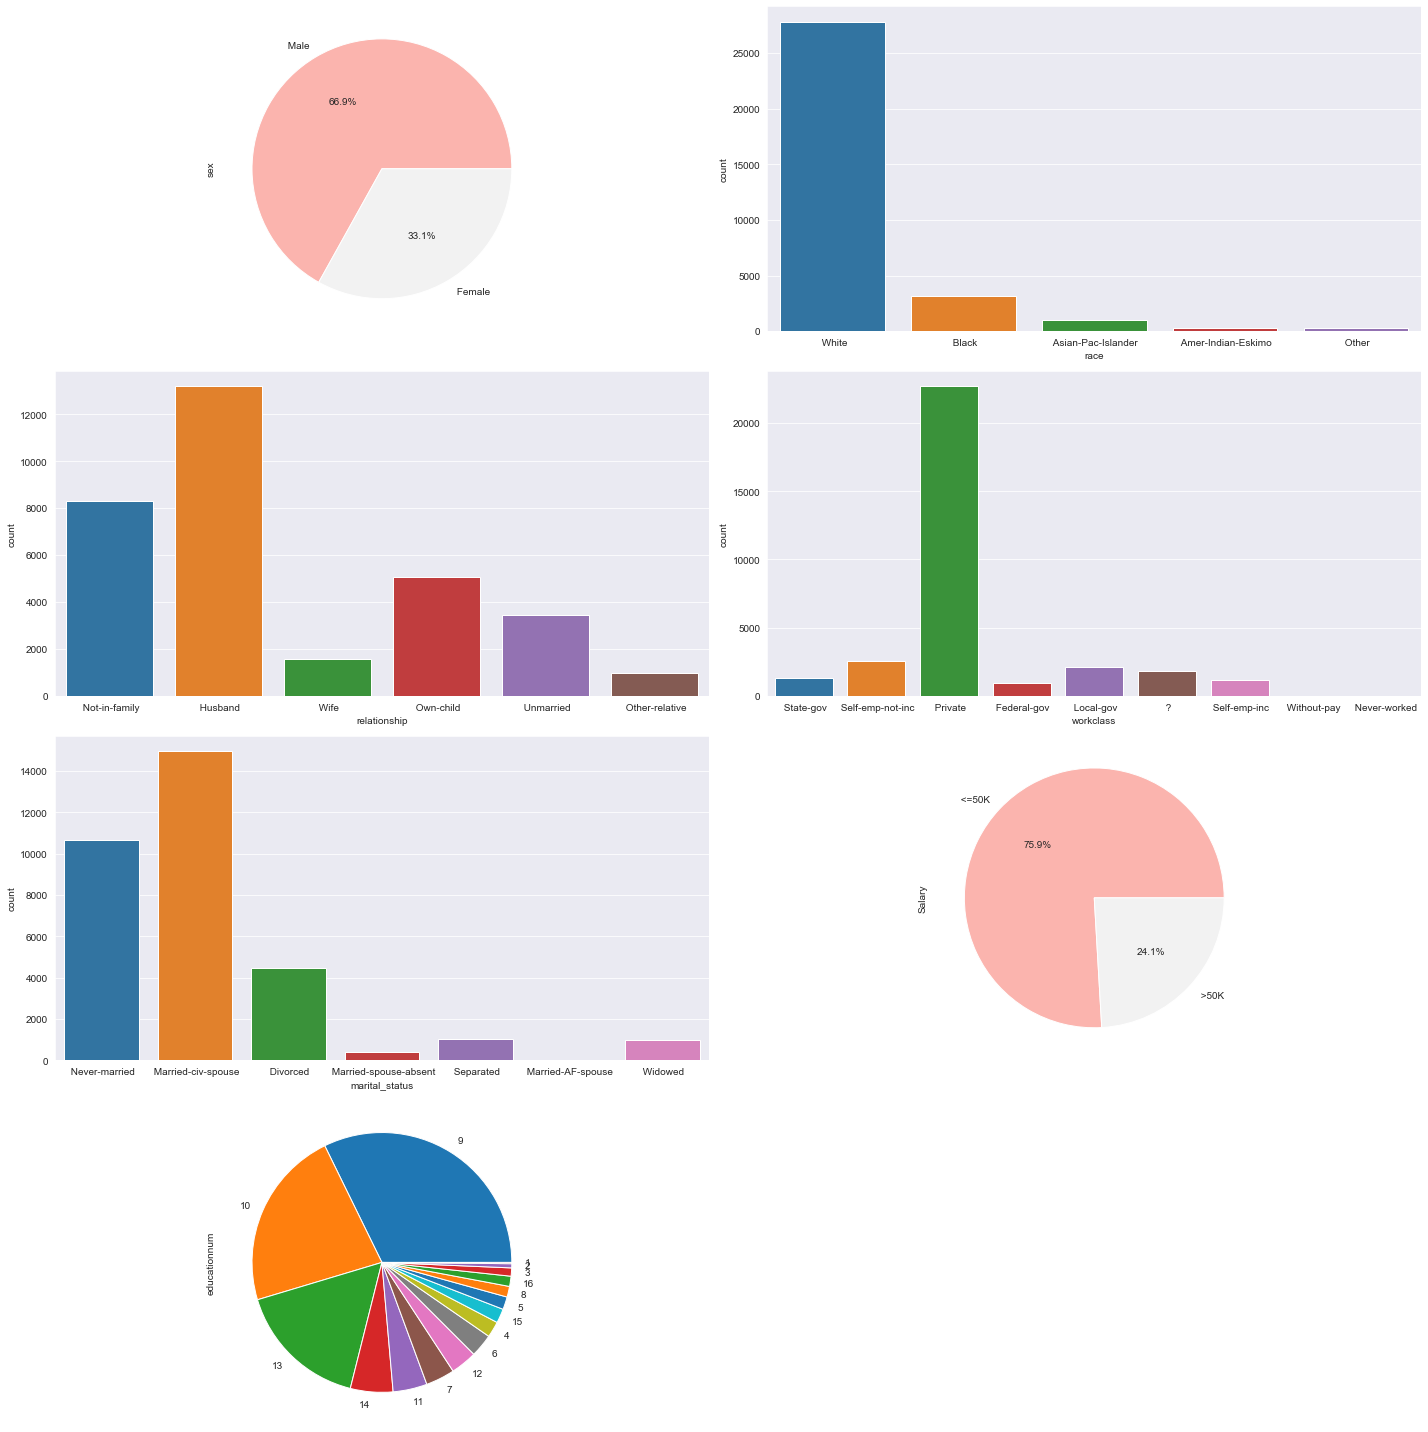

In [5]:
#Subplots for various countplot of our dataset
fig, ax = plt.subplots(4, 2, figsize=(20,20))
fig.delaxes(ax[3,1])

#sns.countplot(df['sex'],ax= ax[0,0]);
df['sex'].value_counts().plot.pie(cmap = 'Pastel1',ax = ax[0,0],autopct='%.1f%%');

sns.countplot(df['race'],ax = ax[0,1])

sns.countplot(df['relationship'],ax = ax[1,0])

sns.countplot(df['workclass'],ax = ax[1,1])

sns.countplot(df['marital_status'],ax = ax[2,0])

df['Salary'].value_counts().plot.pie(cmap = 'Pastel1',ax = ax[2,1],autopct='%.1f%%');

df['educationnum'].value_counts().plot.pie(ax = ax[3,0]);

plt.tight_layout()

#for ax in fig.axes:
   # plt.sca(ax)
    #plt.xticks(rotation=70)

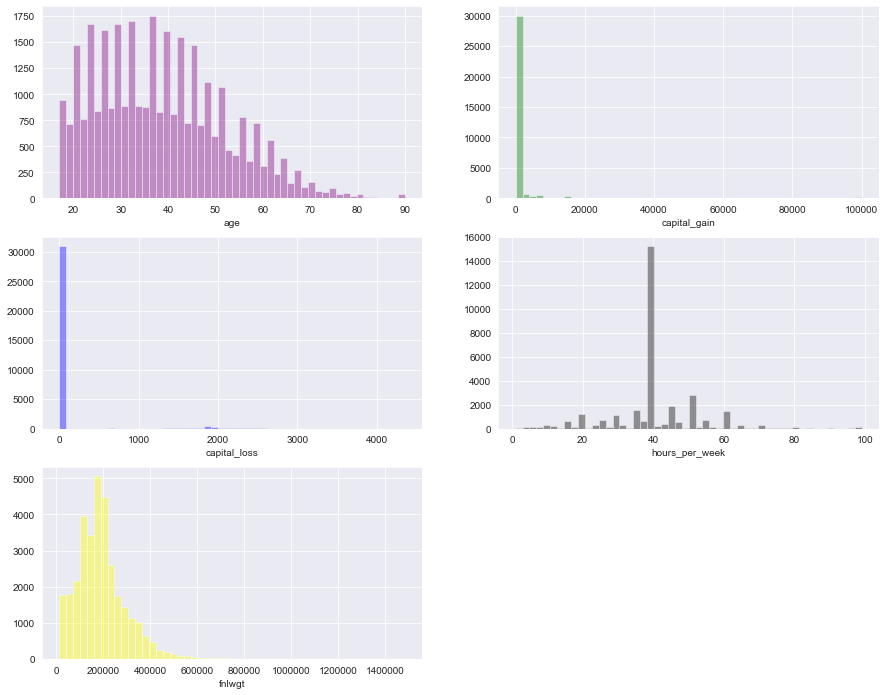

In [6]:
#Distribution plots of our dataset
fig, ax = plt.subplots(3, 2, figsize=(15,12))
fig.delaxes(ax[2,1])
sns.distplot(df['age'],kde = False,ax = ax[0,0],color='Purple')
sns.distplot(df['capital_gain'],kde = False,ax = ax[0,1],color='Green')
sns.distplot(df['capital_loss'],kde = False,ax = ax[1,0],color='Blue')
sns.distplot(df['hours_per_week'],kde = False,ax = ax[1,1],color='Black')
sns.distplot(df['fnlwgt'],kde = False,ax = ax[2,0],color='yellow');

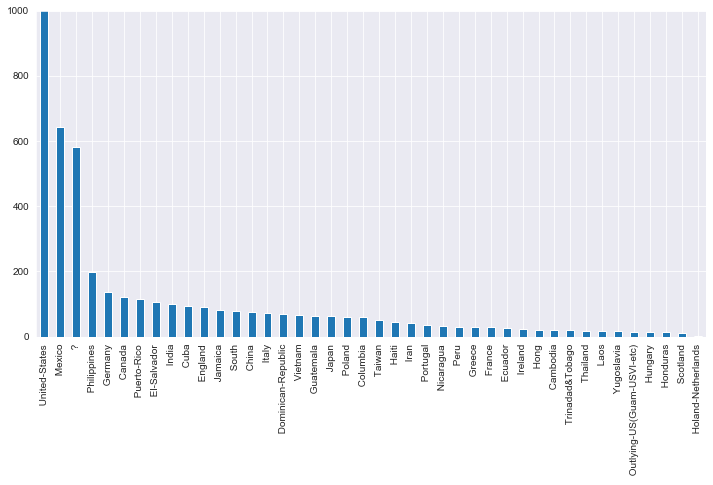

In [7]:
#Bar plot for Native Country
plt.figure(figsize = (12,6))
df['native_country'].value_counts().plot.bar()
plt.ylim((0,1000));

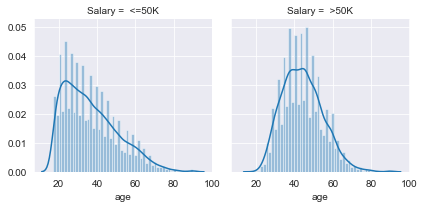

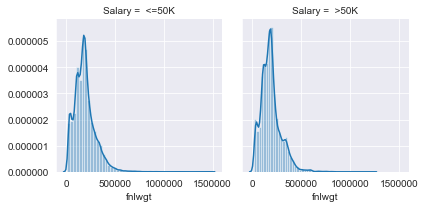

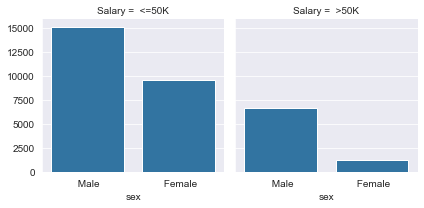

In [8]:
#Facet grids for distribution and countplot
g = sns.FacetGrid(df, col='Salary')
g = g.map(sns.distplot, "age")

g = sns.FacetGrid(df, col='Salary')
g = g.map(sns.distplot, "fnlwgt")

g = sns.FacetGrid(df, col='Salary')
g = g.map(sns.countplot, "sex")
plt.show()

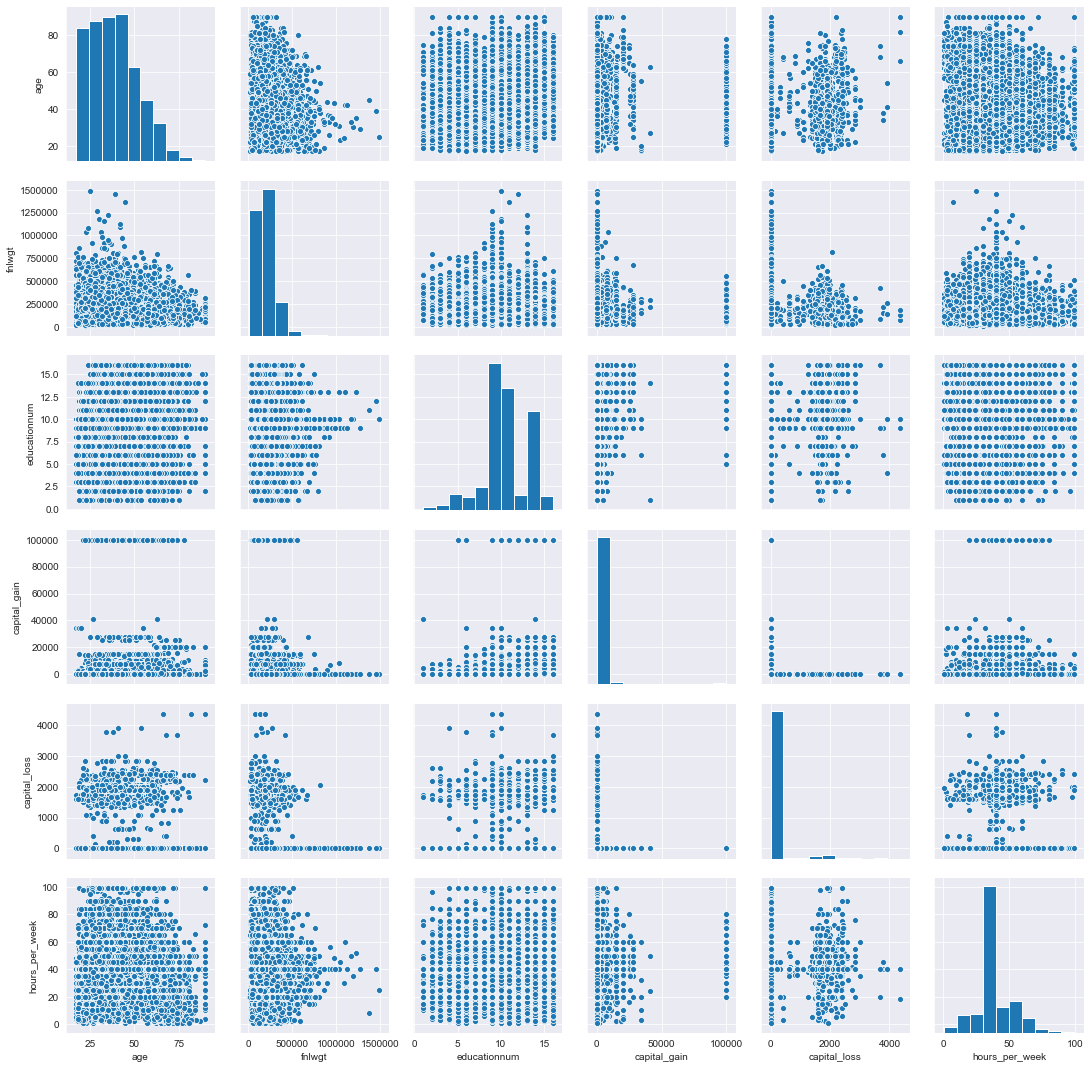

In [9]:
#Pairplot for dataframe
sns.pairplot(df);

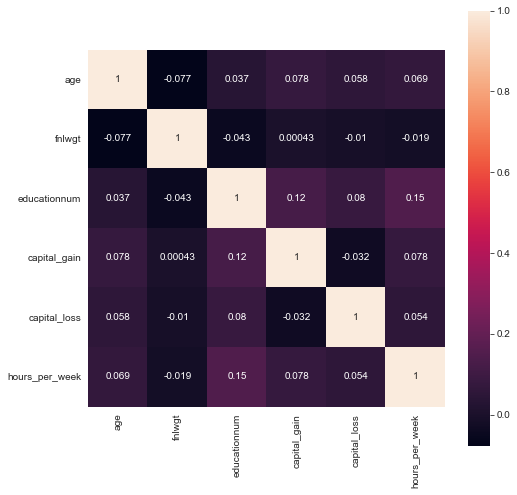

In [10]:
#Heatmap for numerical columns
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),annot = True,square = True);

In [11]:
#Checking the unique of each attribute to look for uncommon values
for i,cols in enumerate(['age', 'workclass', 'fnlwgt', 'education', 'educationnum','marital_status', 'occupation', 'relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country','Salary']):
    print('Unique of {} is : \n{}'.format(cols,df[cols].unique()))
    print('\n')

Unique of age is : 
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


Unique of workclass is : 
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Unique of fnlwgt is : 
[ 77516  83311 215646 ...  34066  84661 257302]


Unique of education is : 
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Unique of educationnum is : 
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Unique of marital_status is : 
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


Unique of occupation is : 
[' Adm-clerical' ' Exec-managerial' ' Handlers

### Step 2: Data Cleaning and Preprocessing

#### Creating functions to correct the data as per need

In [12]:
#Function to clean column
def sex(param):
    if param == 'Male':
        return 1
    else:
        return 0
df['sex'] = df['sex'].apply(sex)

In [13]:
#Function to clean marriage status
def status(param):
    if param == 'Married-civ-spouse':
        return 1
    elif param == 'Married-spouse-absent':
        return 1
    elif param == 'Married-AF-spouse':
        return 1
    else:
        return 0
df['marital_status'] = df['marital_status'].apply(sex)

#### Deleting unnecessary attributes

In [14]:
#Deleting the unnecessary attributes
df.drop(["workclass","education","occupation","relationship","race","native_country"], axis = 1, inplace = True)
df.head()

,age,fnlwgt,educationnum,marital_status,sex,capital_gain,capital_loss,hours_per_week,Salary
0,39,77516,13,0,0,2174,0,40,<=50K
1,50,83311,13,0,0,0,0,13,<=50K
2,38,215646,9,0,0,0,0,40,<=50K
3,53,234721,7,0,0,0,0,40,<=50K
4,28,338409,13,0,0,0,0,40,<=50K


#### So the data has been cleaned for machine learning! Now to preprocess it!

In [15]:
#Assigning X and y values for machine learning
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [16]:
X

array([[    39,  77516,     13, ...,   2174,      0,     40],
       [    50,  83311,     13, ...,      0,      0,     13],
       [    38, 215646,      9, ...,      0,      0,     40],
       ...,
       [    58, 151910,      9, ...,      0,      0,     40],
       [    22, 201490,      9, ...,      0,      0,     20],
       [    52, 287927,      9, ...,  15024,      0,     40]], dtype=int64)

In [17]:
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [18]:
#Applying label Encoder to y to make <=50K salary as 0 and >50K as 1
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 1])

#### Outlier Removal

In [19]:
df_i = df.copy()

In [24]:
Q1 = df_i.quantile(0.25)
Q3 = df_i.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df_i = df_i[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_i.shape

age                   18.0
fnlwgt            109924.0
educationnum           2.0
marital_status         0.0
sex                    0.0
capital_gain           0.0
capital_loss           0.0
hours_per_week         0.0
dtype: float64


(11842, 9)

In [25]:
x = df_i.iloc[:,:-1].values
Y = df_i.iloc[:,-1].values

In [26]:
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)
Y

array([0, 0, 0, ..., 0, 1, 0])

#### Using Label Encoder <=50K salary has been changed to 0 and >50K salary has been changed to 1

### Step 3: Machine Learning
##### Using all the dependent variables we will be predicting the independent variable

# K Nearest Neighbors

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.23,random_state=1)

In [28]:
k_range = np.arange(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores.index(max(scores)), max(scores))

24 0.8110814419225634


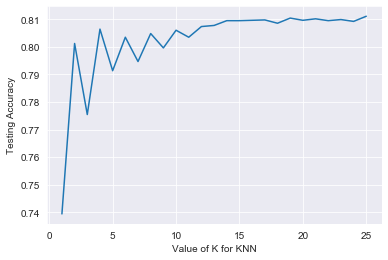

In [29]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)

#### Now to apply model on outlier removed data

In [30]:
x_train,x_test, Y_train, Y_test = train_test_split(x,Y,test_size=0.23,random_state=1)

In [31]:
k_range = np.arange(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, Y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(Y_test, y_pred))
print(scores.index(max(scores)), max(scores))

19 0.8175477239353891


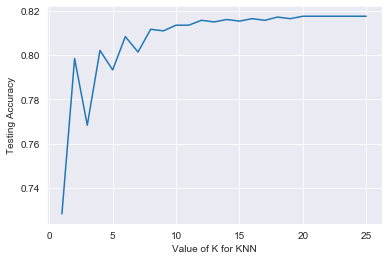

In [32]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)

In [33]:
k_range = list(range(1, 21))
params = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), params, cv=10, scoring='accuracy')

In [34]:
grid.fit(x,Y)
print(grid.best_params_)
print('The accuracy of our K-Nearest Neighbor model is:',round(grid.best_score_*100,2),'%')

{'n_neighbors': 20}
The accuracy of our K-Nearest Neighbor model is: 82.27 %


# Logistic Regression

In [35]:
model = LogisticRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)

In [36]:
model.score(X_train,y_train)

0.7935862151489769

In [37]:
print(metrics.accuracy_score(y_test,preds))

0.8061415220293725


In [38]:
print(metrics.confusion_matrix(y_test, preds))

[[5609  196]
 [1256  429]]


In [39]:
print(metrics.precision_score(y_test, preds))

0.6864


In [40]:
print(metrics.f1_score(y_test, preds))

0.37142857142857144


In [41]:
print(metrics.recall_score(y_test, preds))

0.2545994065281899


In [42]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
cv = GridSearchCV(LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)

In [43]:
cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [44]:
preds=cv.predict(X_test)
cv.score(X_train,y_train)

0.8136093494475689

In [45]:
metrics.accuracy_score(preds,y_test)

0.8214953271028037

In [46]:
print(metrics.precision_score(y_test, preds))

0.6839323467230444


In [47]:
print(metrics.f1_score(y_test, preds))

0.4918282022044849


In [48]:
print(metrics.recall_score(y_test, preds))

0.3839762611275964


In [49]:
cv.best_params_

{'C': 1, 'penalty': 'l1'}

#### Now to apply model on outlier removed data

In [50]:
model = LogisticRegression()
model.fit(x_train,Y_train)
preds = model.predict(x_test)

In [51]:
model.score(x_train,Y_train)

0.8251809607370038

In [52]:
print(metrics.accuracy_score(Y_test,preds))

0.8175477239353891


In [53]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
cv = GridSearchCV(LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)

In [54]:
cv.fit(x_train,Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [55]:
preds=cv.predict(x_test)
cv.score(x_train,Y_train)

0.8259486729545953

In [56]:
metrics.accuracy_score(preds,Y_test)

0.8142437591776799

In [57]:
cv.best_params_

{'C': 100, 'penalty': 'l1'}